In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pprint
import time
pd.pandas.set_option('display.max_columns', None)

In [4]:
dir_path = 'E:/Data Science/DS/Data Science Projects/Raw Data/'

In [6]:
df = pd.read_csv(dir_path + 'creditcard.csv')

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
def balancing(data):
    normal = (data['Class'].value_counts()/data['Class'].shape[0]*100)[0]
    fraud = (data['Class'].value_counts()/data['Class'].shape[0]*100)[1]
    print('Normal Transection: {} %'.format(np.round(normal, 4)))
    print('Fraud Transection: {} %'.format(np.round(fraud, 4)))

In [7]:
balancing(df)

Normal Transection: 99.8273 %
Fraud Transection: 0.1727 %


<AxesSubplot:>

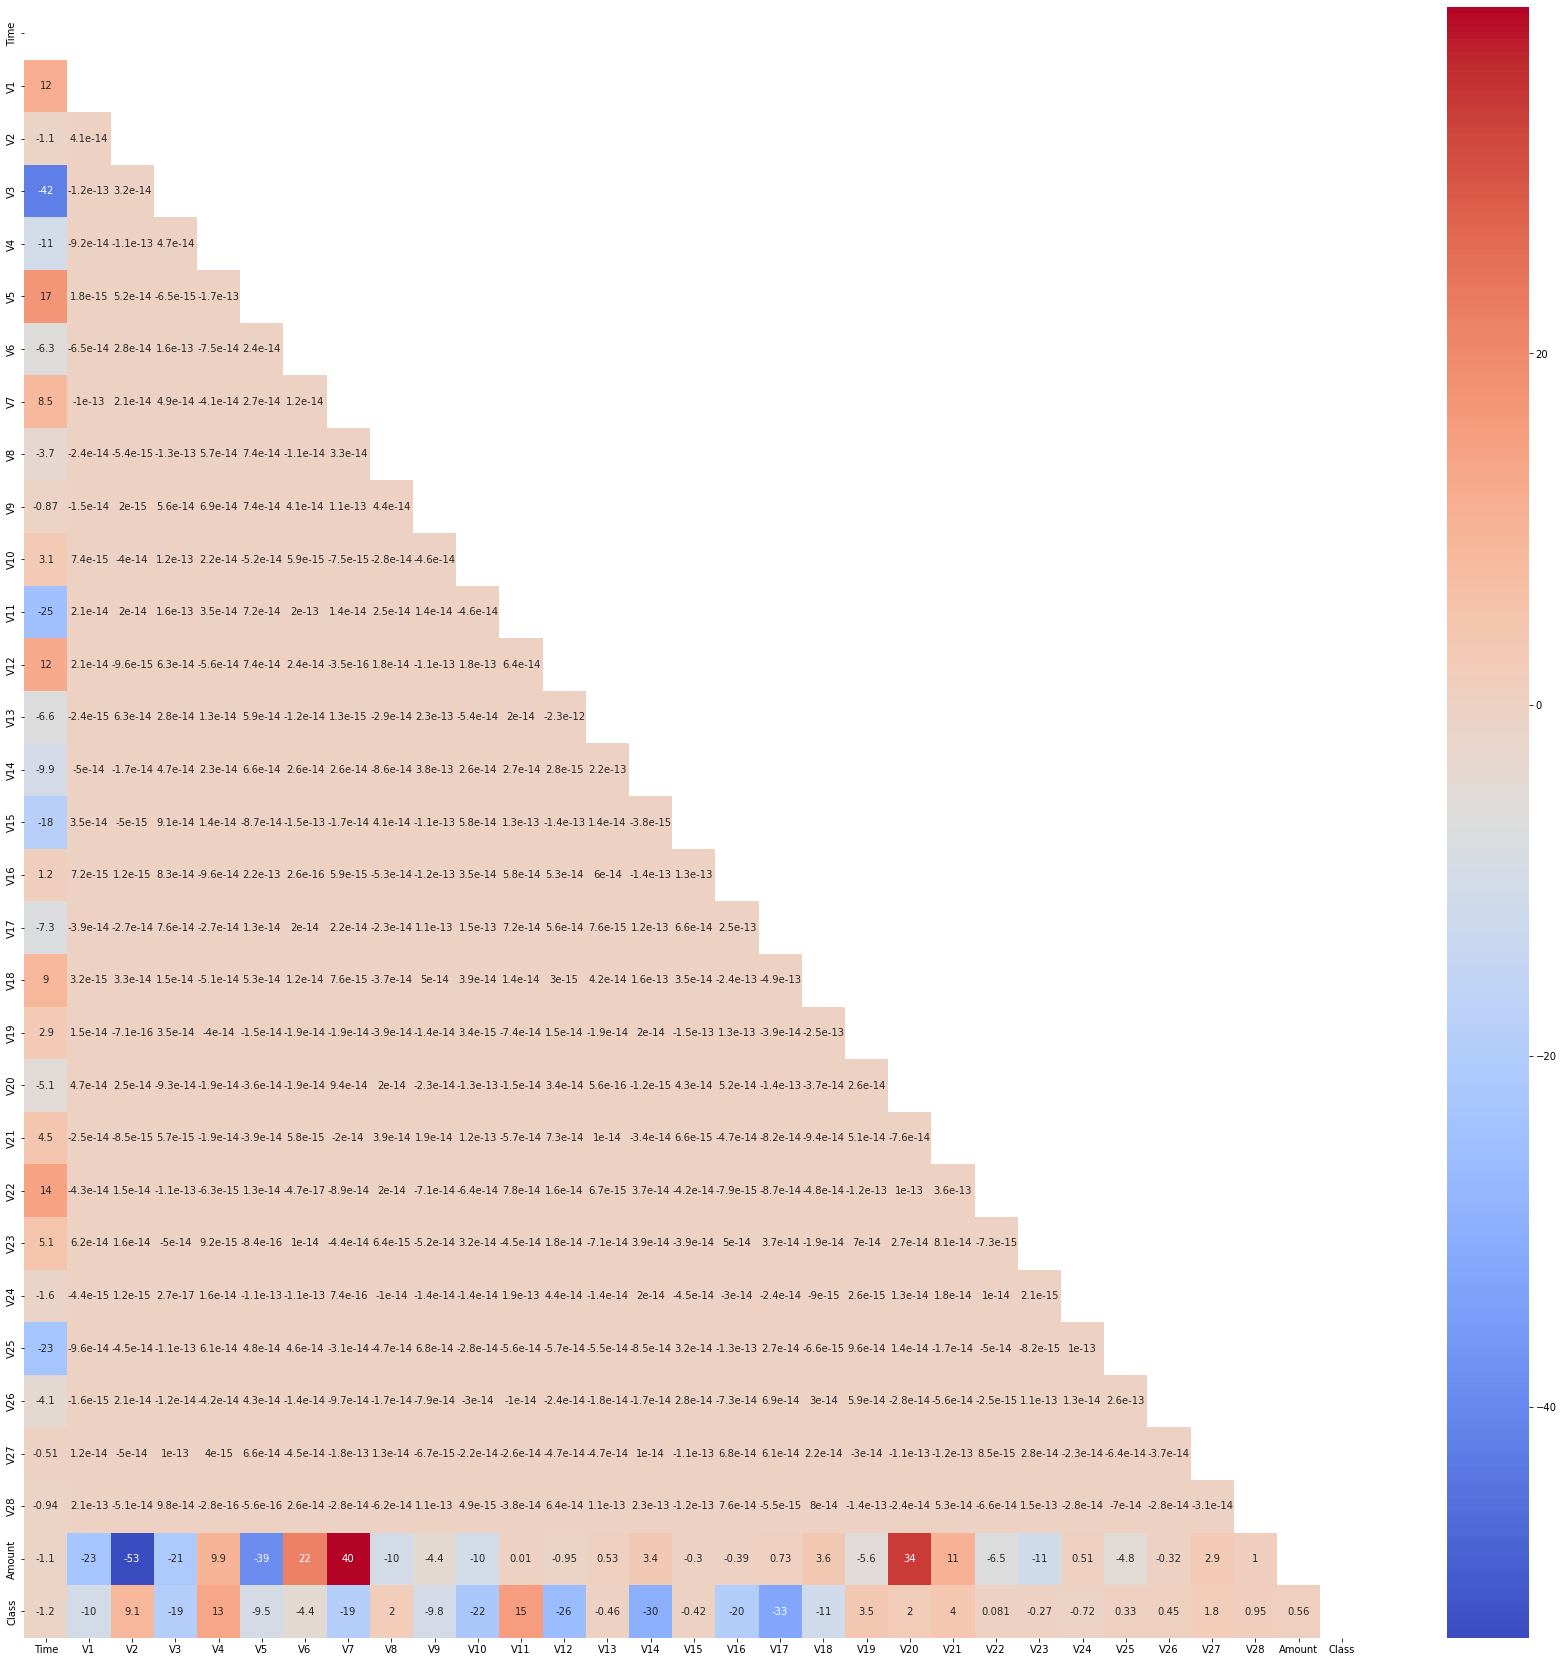

In [8]:
plt.figure(figsize=(30,30))

corr = df[df.columns.tolist()].corr()*100

matrix = np.triu(corr, k = 0)

sns.heatmap(corr, annot = True, cmap= 'coolwarm', mask=matrix)

In [9]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import RandomizedSearchCV

#from sklearn.metrics import mean_squared_error
#from xgboost import XGBRegressor
#from sklearn.model_selection import GridSearchCV

In [10]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# Random Forest Without PCA

In [12]:
forest_model = RandomForestClassifier()

In [13]:
forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
y_pred = forest_model.predict(X_test)

In [15]:
forest_model.score(X_train, y_train)

1.0

In [16]:
forest_model.score(X_test, y_test)

0.9995962220427653

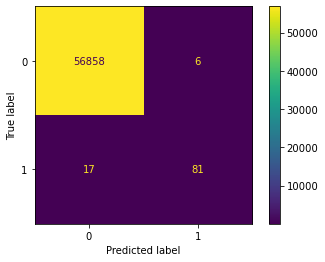

In [17]:
cm = confusion_matrix(y_test, y_pred, labels=forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = forest_model.classes_)
disp.plot()
plt.show()

    If we are curious to see which features are most important to the Random Forest model to predict breast cancer, we can           visualize and quantify the importances by calling the “feature_importances_” method:

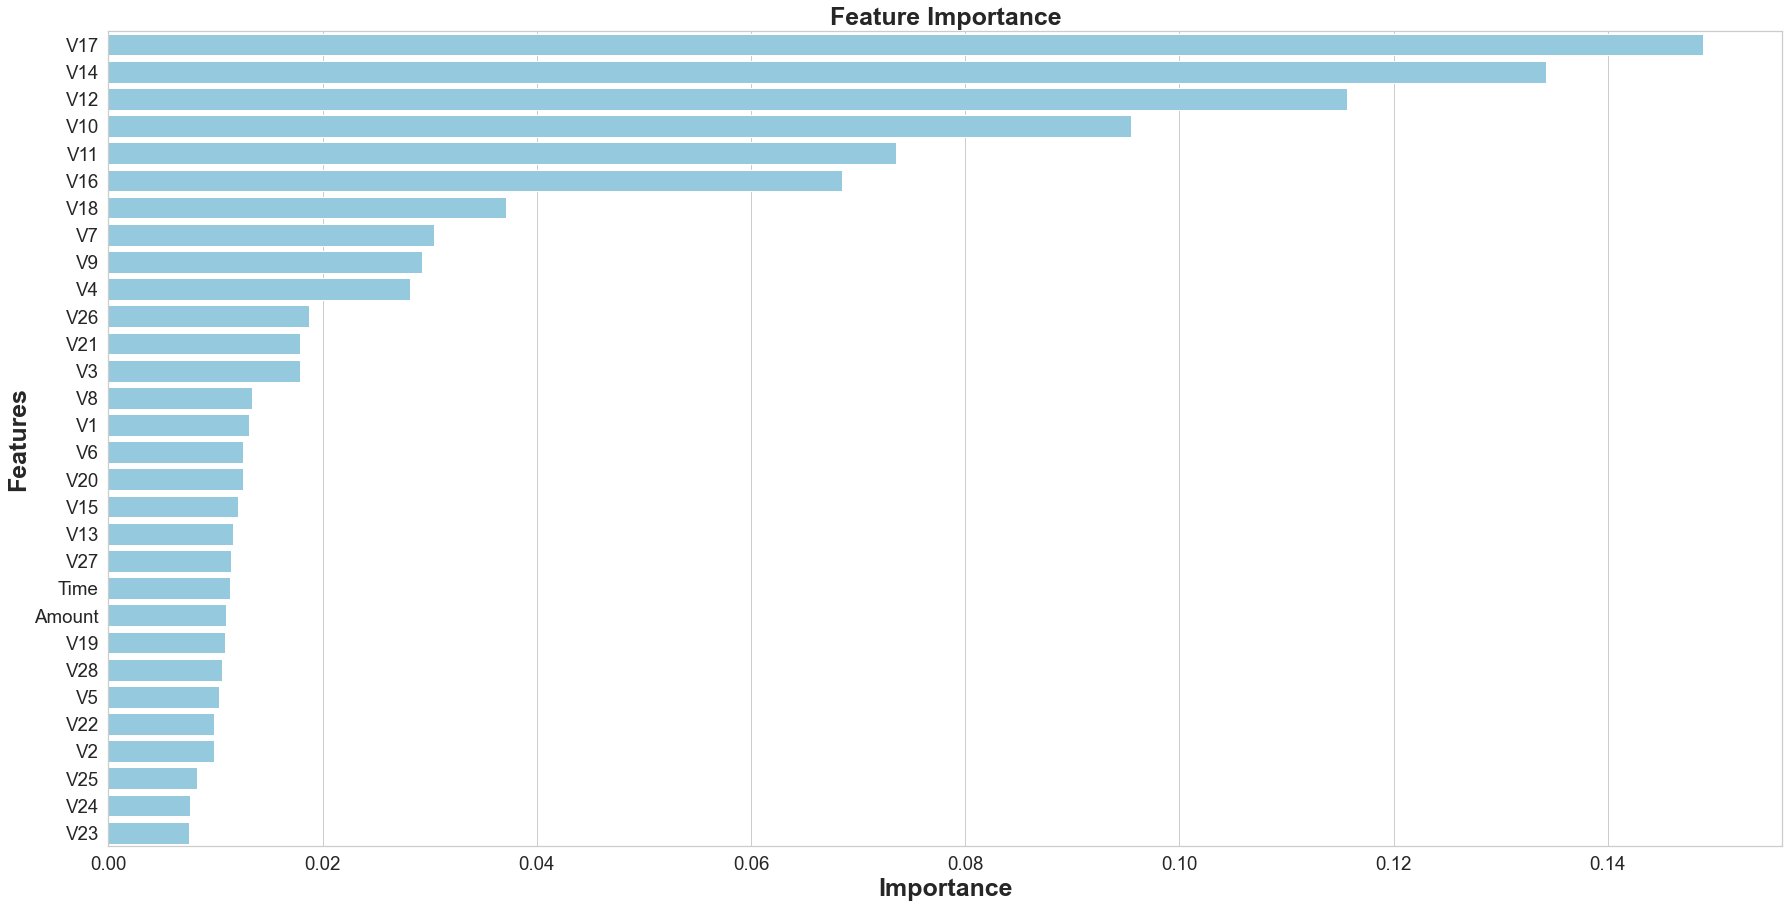

,Features,Gini-Importance
0,V17,0.148843
1,V14,0.134267
2,V12,0.115682
3,V10,0.095458
4,V11,0.073519
5,V16,0.068497
6,V18,0.037089
7,V7,0.030442
8,V9,0.029289
9,V4,0.028171


In [18]:
feats = {}
for feature, importance in zip(X.columns, forest_model.feature_importances_):
    feats[feature] = importance
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
    importances = importances.sort_values(by='Gini-Importance', ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={'index': 'Features'})
    
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
plt.show()
display(importances)    

# Random Forest With PCA

In [19]:
#X_train, X_test, y_train, y_test

In [19]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

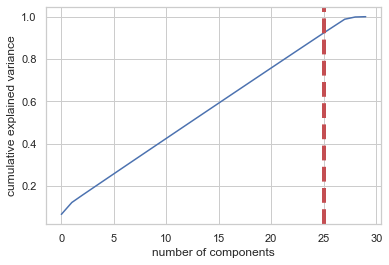

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.065206,0.065206
1,0.121426,0.056220
2,0.155915,0.034489
3,0.189661,0.033746
4,0.223311,0.033650
5,0.256925,0.033614
6,0.290528,0.033604
7,0.324086,0.033558
8,0.357610,0.033524
9,0.391066,0.033456


In [20]:
pca_test = PCA(n_components=30)
pca_test.fit(X_train_scaled)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=25, ymin=0, ymax=1)
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(25))

In [21]:
pca = PCA(n_components=30)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [22]:
pca.explained_variance_  #eigenvalues of covarience matrix

array([1.95619028, 1.68660669, 1.03467519, 1.01237343, 1.00950204,
       1.00842188, 1.00812276, 1.00674405, 1.00571202, 1.00368844,
       1.00318016, 1.00307229, 1.00239769, 1.00137933, 1.00096376,
       0.99994957, 0.99954879, 0.99858727, 0.99806405, 0.9964716 ,
       0.99624426, 0.99579437, 0.99532449, 0.99321616, 0.9906069 ,
       0.9905227 , 0.97432381, 0.96916655, 0.31611507, 0.04316608])

In [23]:
pca.explained_variance_ratio_ #It shows how much varience is explained by each eigenvalues, 

array([0.06520606, 0.05621998, 0.03448902, 0.03374563, 0.03364992,
       0.03361392, 0.03360394, 0.03355799, 0.03352359, 0.03345613,
       0.03343919, 0.0334356 , 0.03341311, 0.03337916, 0.03336531,
       0.03333151, 0.03331815, 0.0332861 , 0.03326866, 0.03321557,
       0.033208  , 0.033193  , 0.03317734, 0.03310706, 0.03302008,
       0.03301728, 0.03247732, 0.03230541, 0.01053712, 0.00143886])

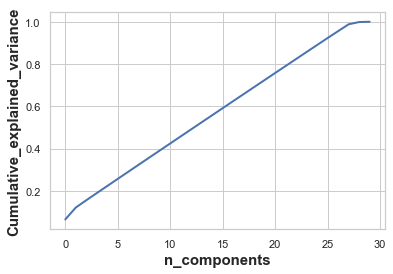

In [24]:
#var_explained = pca.explained_variance_/np.sum(pca.explained_variance_)
#cum_var_explained = np.cumsum(var_explained)

cum_var_explained = np.cumsum(pca.explained_variance_ratio_)

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components', fontsize=15, weight = 'bold')
plt.ylabel('Cumulative_explained_variance', fontsize=15, weight = 'bold')
plt.grid(True)
plt.show()

In [25]:
forest_model = RandomForestClassifier()

In [26]:
forest_model.fit(X_train_pca, y_train)

RandomForestClassifier()

In [27]:
y_pred = forest_model.predict(X_test_pca)

In [28]:
forest_model.score(X_train_pca, y_train)

1.0

In [29]:
forest_model.score(X_test_pca, y_test)

0.9995962220427653

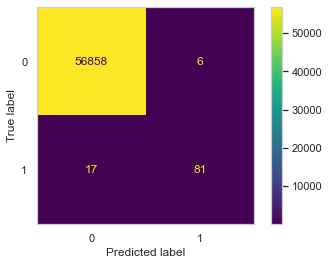

In [30]:
cm = confusion_matrix(y_test, y_pred, labels=forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = forest_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

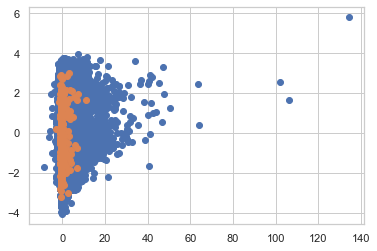

In [31]:
x_set, y_set = X_train_pca, y_train
plt.scatter(x_set[y_set==0, 0], x_set[y_set==0, 1])
plt.scatter(x_set[y_set==1, 0], x_set[y_set==1, 1])

# Random Forest with Hyperparameter Tuning

In [32]:
rfc_2 = RandomForestClassifier()

In [33]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rs = RandomizedSearchCV(rfc_2, 
                        param_dist, 
                        n_iter = 15, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train_pca, y_train)
rs.best_params_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


{'n_estimators': 400,
 'min_samples_split': 23,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 14,
 'bootstrap': False}

    With n_iter = 50 and cv = 3, we created 150 Random Forest models, randomly sampling combinations of the hyperparameters         input above. We can call “best_params_” to get the best performing model’s parameters (shown at the bottom of the code box       above). However, “best_params_” at this stage may not give us the best insight to get a range of parameters to try for the       next round of hyperparameter tuning. To get a good range of values to try next, we can easily get a dataframe of our             RandomSearchCV results.

In [34]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop = True)

In [36]:
rs_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1040.182521,2.417263,3.734610,0.143085,400,23,2,sqrt,14,False,"{'n_estimators': 400, 'min_samples_split': 23,...",0.999500,0.999263,0.999592,0.999451,0.000139,1
1,1406.008947,2.698518,3.328421,0.244163,700,12,2,sqrt,13,False,"{'n_estimators': 700, 'min_samples_split': 12,...",0.999500,0.999263,0.999592,0.999451,0.000139,1
2,577.097520,6.905209,3.298280,0.072380,400,23,12,sqrt,11,True,"{'n_estimators': 400, 'min_samples_split': 23,...",0.999394,0.999170,0.999539,0.999368,0.000152,3
3,96.442093,2.018600,0.665483,0.030039,100,18,23,sqrt,8,True,"{'n_estimators': 100, 'min_samples_split': 18,...",0.999421,0.999170,0.999500,0.999364,0.000140,4
4,1042.168366,6.966400,5.994652,0.186395,800,34,28,sqrt,7,False,"{'n_estimators': 800, 'min_samples_split': 34,...",0.999381,0.999170,0.999513,0.999355,0.000141,5


In [37]:
rs_df1 = rs_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'],
            axis=1)
rs_df1.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,400,23,2,sqrt,14,False,0.999451,1
1,700,12,2,sqrt,13,False,0.999451,1
2,400,23,12,sqrt,11,True,0.999368,3
3,100,18,23,sqrt,8,True,0.999364,4
4,800,34,28,sqrt,7,False,0.999355,5
5,700,7,23,log2,12,False,0.999350,6
6,200,50,44,sqrt,8,False,0.999346,7
7,400,50,50,sqrt,6,False,0.999280,8
8,500,44,44,log2,9,False,0.999232,9
9,400,7,34,log2,7,False,0.999228,10


In [38]:
rs.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=14, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=23,
                       n_estimators=400)

In [39]:
forest_model = RandomForestClassifier(bootstrap=False, max_depth=13, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=12,
                       n_estimators=700)

In [40]:
forest_model.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=False, max_depth=13, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=12,
                       n_estimators=700)

In [58]:
y_pred = forest_model.predict(X_test_pca)

In [59]:
forest_model.score(X_train_pca, y_train)

0.9997015514933397

In [60]:
forest_model.score(X_test_pca, y_test)

0.9995962220427653

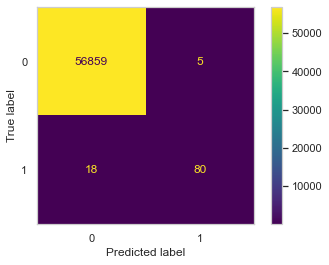

In [61]:
cm = confusion_matrix(y_test, y_pred, labels=forest_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = forest_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [12]:
feature_sel_model_train = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model_train.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [13]:
feature_sel_model_train.get_support()

array([False,  True,  True,  True,  True, False, False,  True, False,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [14]:
selected_feature = X_train.columns[feature_sel_model_train.get_support()]


print('Total no of feature {}'.format(X_train.shape[1]))
print('total Selected features {}'.format(len(selected_feature)))
print('feature with coef shrank to zero {}'.format(np.sum(feature_sel_model_train.estimator_.coef_ == 0)))

Total no of feature 30
total Selected features 11
feature with coef shrank to zero 17


In [15]:
X_train = X_train[selected_feature]
X_train.head()

,V1,V2,V3,V4,V7,V10,V11,V12,V14,V16,V17
0,-1.359807,-0.072781,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971
1,1.191857,0.266151,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805
2,-1.358354,-1.340163,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969
3,-0.966272,-0.185226,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093
4,-1.158233,0.877737,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033


In [20]:
forest_model = RandomForestClassifier()

In [21]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [22]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [23]:
pprint.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [27]:
#start = time.time()
random_search = RandomizedSearchCV(estimator = forest_model, param_distributions = random_grid, n_iter = 50, cv = 5, verbose =2, random_state = 42, n_jobs = -1)

#end = time.time()
#print(end-start)

In [56]:
random_search.fit(X_train, y_train)

In [57]:
random_search.best_params_

In [ ]:
random_search.best_estimator_